# Bab 2: Proyek Machine Learning End-to-End

Dalam bab ini, kita akan bekerja melalui contoh proyek *Machine Learning* secara menyeluruh, berpura-pura menjadi *data scientist* yang baru direkrut di sebuah perusahaan real estat. Tujuan kita adalah membangun model untuk memprediksi harga perumahan di California berdasarkan data sensus. Kita akan mengikuti langkah-langkah khas proyek *Machine Learning*, mulai dari pemahaman masalah hingga penerapan model.

**Daftar Isi:**

1.  Melihat Gambaran Besar (Look at the Big Picture)
    * Membingkai Masalah (Frame the Problem)
    * Memilih Ukuran Kinerja (Select a Performance Measure)
    * Memeriksa Asumsi (Check the Assumptions)
2.  Mendapatkan Data (Get the Data)
    * Membuat Ruang Kerja (Create the Workspace)
    * Mengunduh Data (Download the Data)
    * Melihat Sekilas Struktur Data (Take a Quick Look at the Data Structure)
    * Membuat *Test Set* (Create a Test Set)
3.  Menjelajahi dan Memvisualisasikan Data untuk Mendapatkan Wawasan (Discover and Visualize the Data to Gain Insights)
    * Memvisualisasikan Data Geografis (Visualizing Geographical Data)
    * Mencari Korelasi (Looking for Correlations)
    * Bereksperimen dengan Kombinasi Atribut (Experimenting with Attribute Combinations)
4.  Mempersiapkan Data untuk Algoritma *Machine Learning* (Prepare the Data for Machine Learning Algorithms)
    * Pembersihan Data (Data Cleaning)
    * Menangani Atribut Teks dan Kategorikal (Handling Text and Categorical Attributes)
    * *Custom Transformers* (Transformer Kustom)
    * *Feature Scaling* (Penskalaan Fitur)
    * *Transformation Pipelines* (Pipeline Transformasi)
5.  Memilih dan Melatih Model (Select and Train a Model)
    * Melatih dan Mengevaluasi pada *Training Set* (Training and Evaluating on the Training Set)
    * Evaluasi yang Lebih Baik Menggunakan *Cross-Validation* (Better Evaluation Using Cross-Validation)
6.  Menyesuaikan Model Anda (*Fine-Tune Your Model*)
    * *Grid Search* (Pencarian Grid)
    * *Randomized Search* (Pencarian Acak)
    * *Ensemble Methods* (Metode Ensemble)
    * Menganalisis Model Terbaik dan Kesalahannya (Analyze the Best Models and Their Errors)
7.  Mengevaluasi Sistem pada *Test Set* (Evaluate Your System on the Test Set)
8.  Meluncurkan, Memantau, dan Memelihara Sistem Anda (Launch, Monitor, and Maintain Your System)

---

### **1. Melihat Gambaran Besar (Look at the Big Picture)**

Pada tahap awal proyek *Machine Learning*, penting untuk memahami konteks bisnis dan tujuan yang ingin dicapai. Ini membantu kita dalam membingkai masalah, memilih metrik kinerja, dan mengidentifikasi asumsi-asumsi penting.

#### **Membingkai Masalah (Frame the Problem)**

Pertama, kita perlu bertanya kepada atasan kita apa sebenarnya tujuan bisnisnya. Membangun model mungkin bukan tujuan akhir. Bagaimana perusahaan mengharapkan untuk menggunakan dan mendapatkan manfaat dari model ini? Mengetahui tujuan itu penting karena akan menentukan bagaimana Anda membingkai masalah, algoritma mana yang akan Anda pilih, ukuran kinerja mana yang akan Anda gunakan untuk mengevaluasi model Anda, dan berapa banyak upaya yang akan Anda habiskan untuk menyempurnakannya.

Dalam kasus ini, output model kita (prediksi harga median distrik) akan diumpankan ke sistem *Machine Learning* lain untuk menentukan apakah suatu area layak diinvestasikan atau tidak.

**Teori:**
* **Pipeline Machine Learning:** Urutan komponen pemrosesan data disebut *data pipeline*. *Pipeline* ini umum dalam sistem *Machine Learning* karena melibatkan manipulasi data dan banyak transformasi data.
* **Jenis Masalah ML:**
    * **Supervised Learning:** Data pelatihan mencakup solusi yang diinginkan (label).  Contoh: klasifikasi (memprediksi kelas) dan regresi (memprediksi nilai numerik).
    * **Unsupervised Learning:** Data pelatihan tidak berlabel.  Sistem mencoba belajar tanpa "guru".  Contoh: *clustering*, deteksi anomali, visualisasi, dan reduksi dimensi.
    * **Semi-supervised Learning:** Menggunakan kombinasi data berlabel dan tidak berlabel.
    * **Reinforcement Learning:** Sistem belajar dengan berinteraksi dengan lingkungan, memilih tindakan, dan menerima *reward* atau *penalty*.
* **Jenis Pembelajaran:**
    * **Batch Learning:** Sistem dilatih menggunakan semua data yang tersedia secara *offline*.  Tidak dapat belajar secara bertahap.
    * **Online Learning:** Sistem dilatih secara bertahap dengan data yang masuk secara berurutan.  Cocok untuk data yang terus-menerus mengalir.

Untuk proyek harga rumah ini:
* Ini adalah tugas **Supervised Learning** karena kita memiliki data berlabel (harga median rumah).
* Ini adalah tugas **Regression** karena kita memprediksi nilai numerik (harga).
* Lebih spesifik, ini adalah masalah **Multiple Regression** (menggunakan banyak fitur) dan **Univariate Regression** (memprediksi satu nilai output).
* Kita akan menggunakan **Batch Learning** karena data cukup kecil untuk muat di memori dan tidak ada kebutuhan untuk adaptasi cepat terhadap perubahan data.

In [1]:
# Kode untuk membingkai masalah (tidak ada kode eksekusi, lebih ke konseptual)

# Tujuan Bisnis: Memprediksi harga median perumahan di suatu distrik
# Bagaimana model akan digunakan: Sebagai input untuk sistem ML lain untuk analisis investasi.
# Solusi saat ini: Estimasi manual oleh para ahli (mahal, lambat, tidak akurat >20% kesalahan).
# Jenis masalah: Supervised Learning (kita punya label harga)
# Tipe tugas: Regresi (memprediksi nilai numerik)
# Pembelajaran: Batch Learning (data statis, cukup kecil untuk memori)

#### **Memilih Ukuran Kinerja (Select a Performance Measure)**

Langkah selanjutnya adalah memilih ukuran kinerja. Untuk masalah regresi, ukuran kinerja yang umum adalah *Root Mean Square Error* (RMSE). Ini memberikan gambaran tentang seberapa besar kesalahan yang biasanya dibuat oleh sistem dalam prediksinya, dengan bobot yang lebih tinggi untuk kesalahan besar.

**Teori:**
* **Root Mean Square Error (RMSE):** Mengukur deviasi standar dari residual (perbedaan antara nilai yang diprediksi dan nilai aktual). Ini peka terhadap *outlier*.
    $$RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^{2}}$$
    * $m$: jumlah instance dalam dataset.
    * $x^{(i)}$: vektor fitur instance ke-i.
    * $y^{(i)}$: label (nilai target) instance ke-i.
    * $h$: fungsi prediksi sistem (hipotesis).
* **Mean Absolute Error (MAE):** Mengukur rata-rata dari nilai absolut residual.  Kurang peka terhadap *outlier* dibandingkan RMSE.
    $$MAE(X,h)=\frac{1}{m}\sum_{i=1}^{m}|h(x^{(i)})-y^{(i)}|$$
* **Norms ($l_k$):** RMSE berkaitan dengan $l_2$ norm (jarak Euclidean), sedangkan MAE berkaitan dengan $l_1$ norm (jarak Manhattan).  $l_k$ norm yang lebih tinggi lebih fokus pada nilai-nilai besar.

In [2]:
# Teori: Kita akan menggunakan RMSE sebagai metrik utama.
# Jika banyak outlier, mungkin pertimbangkan MAE.

#### **Memeriksa Asumsi (Check the Assumptions)**

Penting untuk mencatat dan memverifikasi asumsi-asumsi yang telah dibuat sejauh ini. Ini dapat membantu mendeteksi masalah serius sejak awal. Misalnya, asumsi bahwa harga yang dihasilkan model akan digunakan sebagaimana adanya oleh sistem hilir. Jika sistem hilir mengubah harga menjadi kategori, maka masalah kita seharusnya dibingkai sebagai tugas klasifikasi, bukan regresi.

In [3]:
# Asumsi: Sistem hilir membutuhkan harga aktual, bukan kategori.
# Verifikasi: Berbicara dengan tim hilir mengkonfirmasi kebutuhan harga aktual.

### **2. Mendapatkan Data (Get the Data)**

Setelah memahami masalahnya, saatnya untuk mendapatkan data dan menyiapkannya.

#### **Membuat Ruang Kerja (Create the Workspace)**

Kita akan membuat direktori kerja dan menginstal pustaka Python yang diperlukan seperti Jupyter, NumPy, pandas, Matplotlib, dan Scikit-Learn.

**Teori:**
* **Lingkungan Terisolasi (Virtual Environment):** Sangat disarankan untuk bekerja dalam lingkungan terisolasi (misalnya menggunakan `virtualenv`) untuk menghindari konflik versi pustaka antar proyek.
* **Jupyter Notebook:** Alat yang kuat untuk pengembangan interaktif, memungkinkan kombinasi kode, output, dan teks.

In [4]:
%matplotlib inline

# Import pustaka yang diperlukan
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib # Untuk menyimpan/memuat model

# PATH untuk menyimpan data dan proyek
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #
HOUSING_PATH = os.path.join("datasets", "housing") #
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #

# Jalankan ini di terminal untuk membuat ruang kerja:
# export ML_PATH="$HOME/ml" # Atau path yang Anda inginkan
# mkdir -p $ML_PATH
# cd $ML_PATH
# python3 -m pip install --user -U virtualenv
# python3 -m virtualenv my_env
# source my_env/bin/activate # Linux/macOS
# .\my_env\Scripts\activate # Windows
# python3 -m pip install -U jupyter matplotlib numpy pandas scipy scikit-learn
# python3 -m ipykernel install --user --name python3
# jupyter notebook

#### **Mengunduh Data (Download the Data)**

Sebaiknya buat fungsi untuk mengunduh data. Ini berguna jika data sering berubah atau jika Anda perlu menginstal dataset di banyak mesin.

In [6]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz") #
    urllib.request.urlretrieve(housing_url, tgz_path) #
    housing_tgz = tarfile.open(tgz_path) #
    housing_tgz.extractall(path=housing_path) #
    housing_tgz.close() #

# Mengunduh data
fetch_housing_data()

# Fungsi untuk memuat data menggunakan pandas
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv") #
    return pd.read_csv(csv_path) #

housing = load_housing_data()

#### **Melihat Sekilas Struktur Data (Take a Quick Look at the Data Structure)**

Penting untuk melihat sekilas data untuk mendapatkan pemahaman umum tentang jenis data yang kita tangani. Ini termasuk melihat beberapa baris pertama, informasi umum tentang kolom, dan ringkasan statistik.

**Teori:**
* **DataFrame `head()`:** Menampilkan N baris pertama dari DataFrame.
* **DataFrame `info()`:** Memberikan ringkasan cepat tentang data, termasuk total jumlah baris, tipe data setiap atribut, dan jumlah nilai non-null.
* **`value_counts()`:** Berguna untuk atribut kategorikal untuk melihat kategori yang ada dan berapa banyak instance di setiap kategori.
* **DataFrame `describe()`:** Menampilkan ringkasan statistik (count, mean, std, min, max, percentile) dari atribut numerik.
* **`hist()`:** Memplot histogram untuk setiap atribut numerik, menunjukkan distribusi nilai.

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

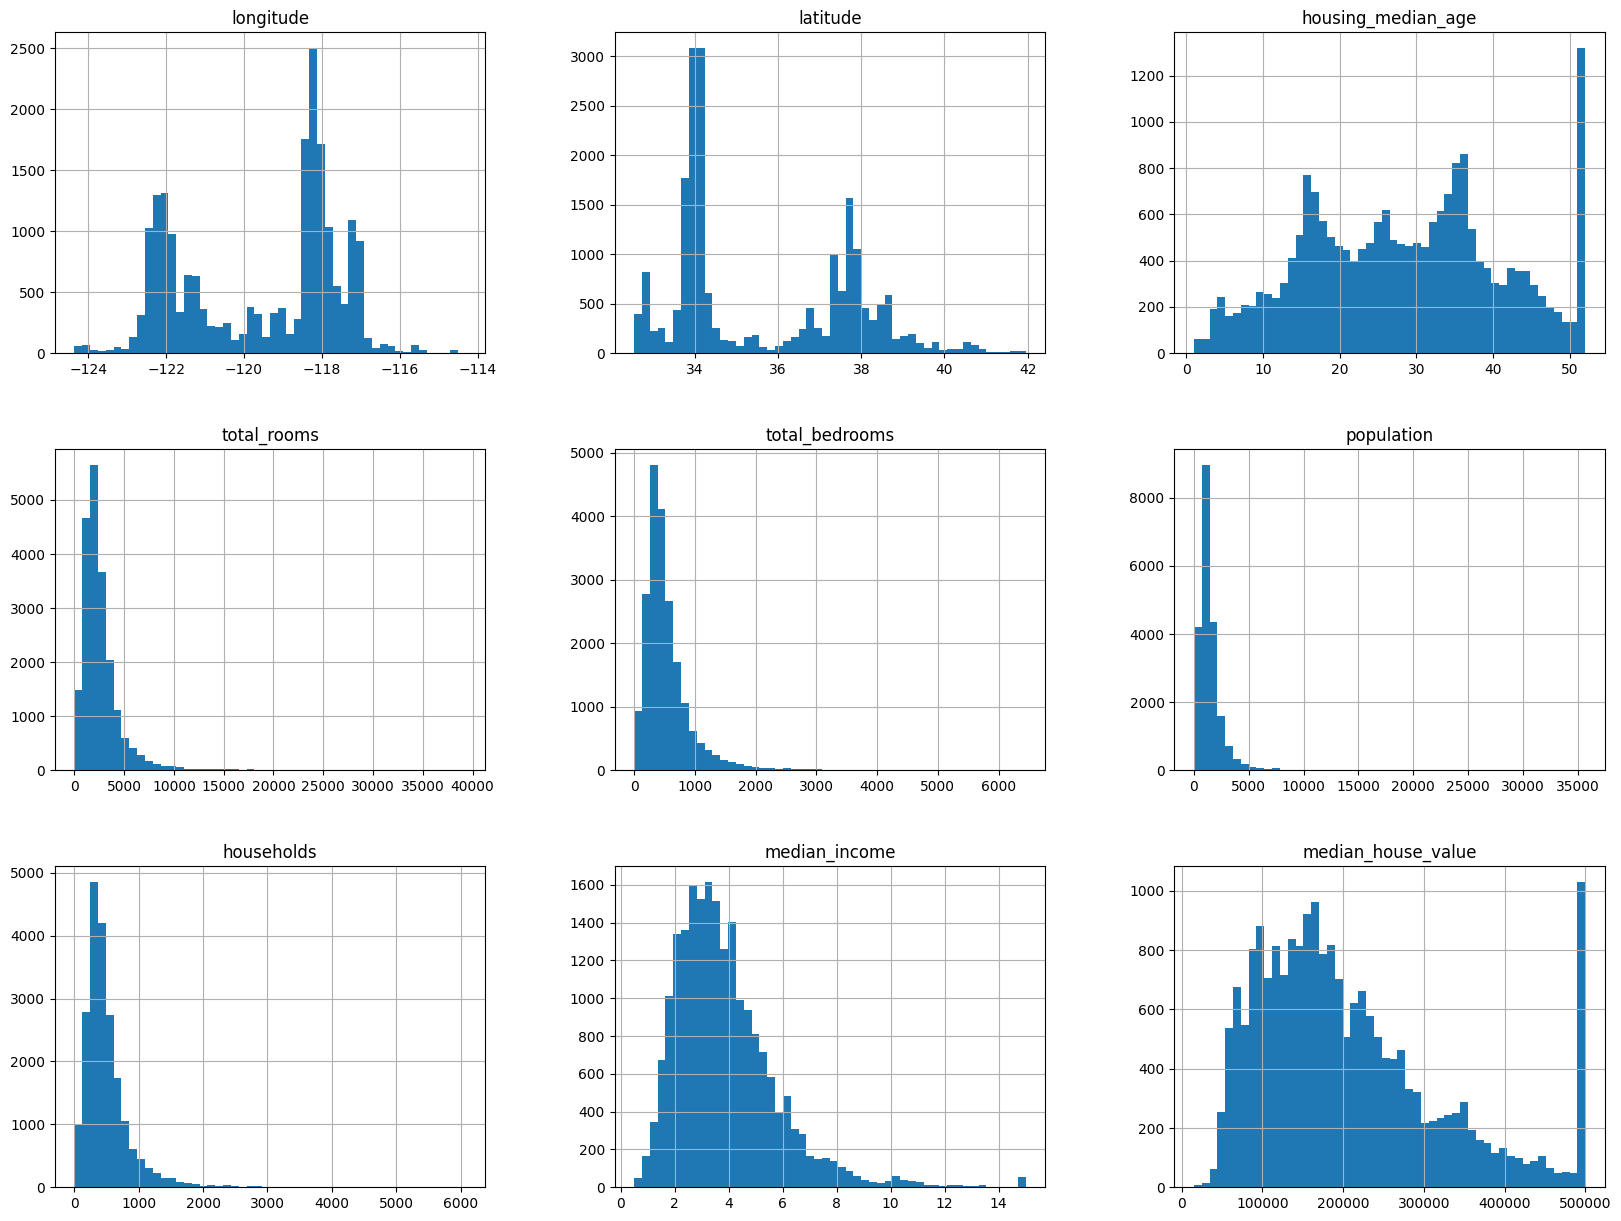

In [7]:
# Melihat 5 baris pertama
print(housing.head()) #

# Mendapatkan info singkat tentang data
print(housing.info()) #

# Melihat kategori dan jumlahnya untuk ocean_proximity
print(housing["ocean_proximity"].value_counts()) #

# Ringkasan statistik atribut numerik
print(housing.describe()) #

# Memplot histogram untuk setiap atribut numerik
housing.hist(bins=50, figsize=(20,15)) #
plt.show() #

# Catatan penting dari histogram:
# 1. median_income: Diskalakan dan dibatasi (capped). Perlu dipahami bagaimana dihitung.
# 2. housing_median_age dan median_house_value: Juga dibatasi. Ini bisa menjadi masalah serius untuk median_house_value (target kita).
#    Jika perlu prediksi di atas $500,000, ada dua opsi:
#    a. Kumpulkan label yang tepat untuk distrik yang dibatasi.
#    b. Hapus distrik tersebut dari training set (dan test set).
# 3. Skala atribut sangat berbeda. Kita akan bahas feature scaling nanti.
# 4. Banyak histogram 'tail-heavy' (ekornya panjang ke kanan). Ini bisa menyulitkan beberapa algoritma ML.

#### **Membuat *Test Set* (Create a Test Set)**

**Penting:** Selalu buat *test set* dan sisihkan sebelum melihat data lebih jauh. Ini untuk menghindari *data snooping bias*.

**Teori:**
* **Data Snooping Bias:** Terjadi ketika Anda secara tidak sengaja "mengintip" *test set*, yang dapat menyebabkan Anda memilih model atau *hyperparameter* yang terlalu optimis pada data tersebut, sehingga performa di dunia nyata tidak sesuai harapan.
* **Pembagian Data:** Umumnya 80% untuk *training* dan 20% untuk *testing*. Ukuran *test set* dapat bervariasi tergantung ukuran dataset.
* **Sampling Murni Acak:** Cara termudah, tetapi bisa menghasilkan *sampling bias* jika dataset tidak cukup besar.
* **Sampling Bias:** Ketika metode *sampling* salah, bahkan sampel yang sangat besar pun bisa tidak representatif.
* **Stratified Sampling:** Membagi populasi menjadi subkelompok homogen (strata) dan mengambil sampel yang tepat dari setiap stratum untuk memastikan *test set* representatif. Ini penting jika ada atribut penting yang distribusinya perlu dipertahankan.
    * Untuk atribut numerik kontinu, perlu dikategorikan terlebih dahulu (binning).
* **Scikit-Learn `train_test_split()`:** Fungsi sederhana untuk membagi dataset secara acak. Parameter `random_state` memastikan hasil yang reproduktif.
* **Scikit-Learn `StratifiedShuffleSplit`:** Untuk *stratified sampling*, memastikan proporsi kategori dalam *test set* mirip dengan *full dataset*.

In [8]:
from sklearn.model_selection import train_test_split

# Membagi data secara acak (tanpa stratified sampling)
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# print(f"Ukuran training set (random): {len(train_set)}")
# print(f"Ukuran test set (random): {len(test_set)}")

# Melakukan stratified sampling berdasarkan pendapatan median
# Asumsi bahwa median_income adalah atribut penting untuk prediksi harga rumah.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) #

# Memvisualisasikan distribusi kategori pendapatan
# housing["income_cat"].hist()
# plt.title("Distribusi Kategori Pendapatan")
# plt.show()

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index] #
    strat_test_set = housing.loc[test_index] #

# Membandingkan proporsi kategori pendapatan di dataset penuh, stratified test set, dan random test set (opsional, untuk verifikasi)
# Jika tertarik dengan perbandingan ini, lihat notebook asli.

# Menghapus atribut 'income_cat' dari training dan test set agar data kembali ke keadaan semula
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) #

# Membuat salinan data training untuk eksplorasi lebih lanjut
housing = strat_train_set.copy() #

### **3. Menjelajahi dan Memvisualisasikan Data untuk Mendapatkan Wawasan (Discover and Visualize the Data to Gain Insights)**

Pada tahap ini, kita akan menggali lebih dalam data pelatihan untuk mendapatkan wawasan. Pastikan hanya menggunakan *training set*.

#### **Memvisualisasikan Data Geografis (Visualizing Geographical Data)**

Karena dataset mengandung informasi geografis (lintang dan bujur), scatter plot sangat berguna untuk memvisualisasikan data.

**Teori:**
* **Scatter Plot:** Menampilkan hubungan antara dua variabel numerik.
* **Alpha Option:** Mengatur transparansi titik pada plot. Nilai `alpha` yang rendah (misalnya 0.1) memungkinkan kita melihat area dengan kepadatan titik data tinggi.
* **`s` (size):** Mengatur ukuran titik pada plot. Dapat digunakan untuk merepresentasikan atribut numerik (misalnya populasi).
* **`c` (color):** Mengatur warna titik pada plot. Dapat digunakan untuk merepresentasikan atribut numerik (misalnya nilai harga rumah), dengan `cmap` (color map) untuk gradasi warna.

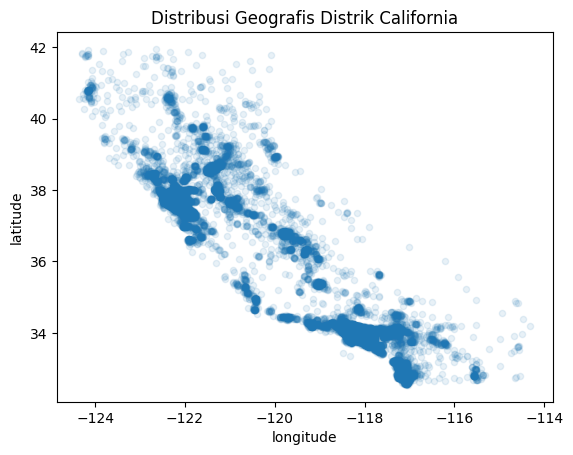

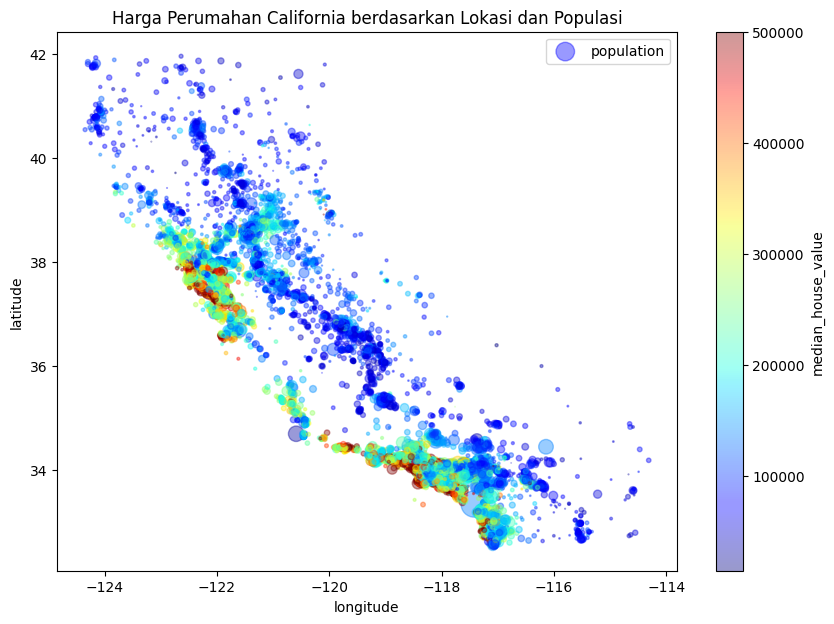

In [9]:
# Scatter plot lintang dan bujur
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #
plt.title("Distribusi Geografis Distrik California")
plt.show()

# Scatter plot dengan harga rumah dan populasi
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) #
plt.legend() #
plt.title("Harga Perumahan California berdasarkan Lokasi dan Populasi")
plt.show()

# Wawasan: Harga rumah sangat terkait dengan lokasi (dekat laut) dan kepadatan populasi.

#### **Mencari Korelasi (Looking for Correlations)**

Kita dapat menghitung koefisien korelasi standar (Pearson's r) antar setiap pasang atribut.

**Teori:**
* **Koefisien Korelasi (Pearson's r):** Berkisar dari -1 hingga 1.
    * Dekat 1: Korelasi positif kuat (satu atribut naik, yang lain cenderung naik).
    * Dekat -1: Korelasi negatif kuat (satu atribut naik, yang lain cenderung turun).
    * Dekat 0: Tidak ada korelasi linier.
* **Keterbatasan Korelasi:** Hanya mengukur korelasi linier, dapat melewatkan hubungan nonlinier.
* **`scatter_matrix()`:** Memplot setiap atribut numerik terhadap setiap atribut numerik lainnya, ditambah histogram setiap atribut pada diagonal utama.

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


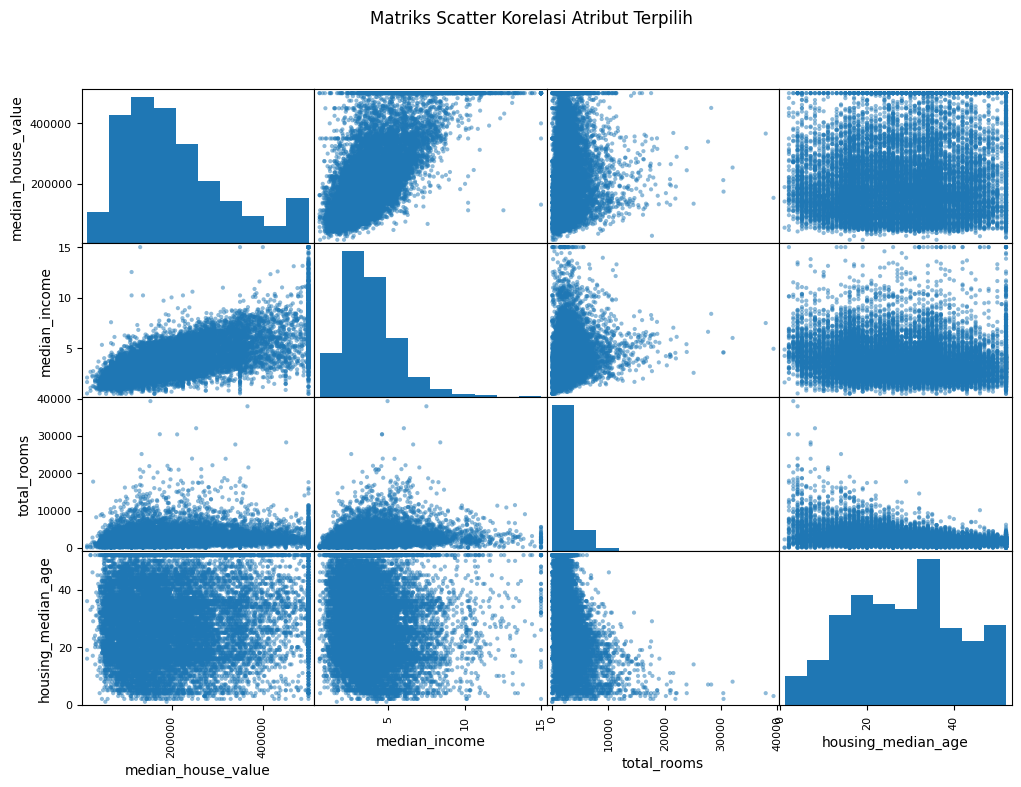

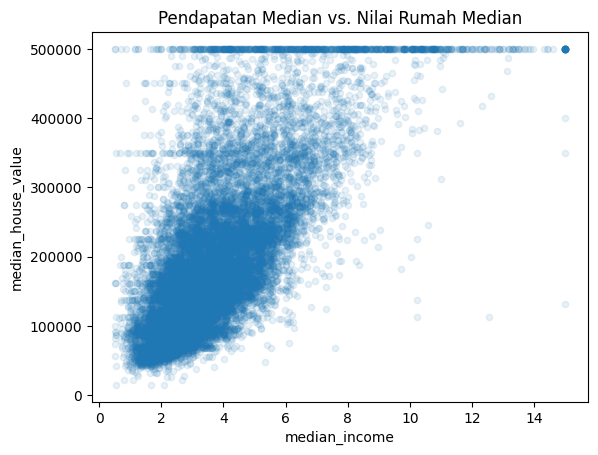

In [10]:
# Menghitung matriks korelasi
corr_matrix = housing.corr(numeric_only=True) # Tambahkan numeric_only=True

# Melihat korelasi dengan median_house_value
print(corr_matrix["median_house_value"].sort_values(ascending=False)) #

# Memvisualisasikan matriks korelasi untuk atribut-atribut penting
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"] #
scatter_matrix(housing[attributes], figsize=(12, 8)) #
plt.suptitle("Matriks Scatter Korelasi Atribut Terpilih")
plt.show()

# Memperbesar scatter plot median_income vs median_house_value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1) #
plt.title("Pendapatan Median vs. Nilai Rumah Median")
plt.show()

# Wawasan: Korelasi kuat antara median_income dan median_house_value.
# Perhatikan 'price cap' dan garis horizontal lainnya yang mungkin merupakan 'data quirks'.

#### **Bereksperimen dengan Kombinasi Atribut (Experimenting with Attribute Combinations)**

Sebelum mempersiapkan data untuk algoritma *Machine Learning*, kita bisa mencoba kombinasi atribut baru yang mungkin lebih informatif.

In [11]:
# Membuat atribut baru
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] #
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] #
housing["population_per_household"] = housing["population"]/housing["households"] #

# Menghitung ulang matriks korelasi dengan atribut baru
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False)) #

# Wawasan: bedrooms_per_room dan rooms_per_household jauh lebih berkorelasi dengan harga rumah.

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


### **4. Mempersiapkan Data untuk Algoritma Machine Learning (Prepare the Data for Machine Learning Algorithms)**

Langkah ini sangat penting. Kita harus menulis fungsi untuk transformasi data agar prosesnya dapat direproduksi, dapat digunakan kembali, dan memungkinkan kita untuk mencoba berbagai kombinasi transformasi secara otomatis.

In [12]:
# Memisahkan prediktor dan label
housing = strat_train_set.drop("median_house_value", axis=1) # membuat salinan
housing_labels = strat_train_set["median_house_value"].copy() #

#### **Pembersihan Data (Data Cleaning)**

Sebagian besar algoritma *Machine Learning* tidak dapat bekerja dengan fitur yang hilang. Ada beberapa opsi untuk menanganinya.

**Teori:**
* **Opsi Penanganan Missing Values:**
    1.  Singkirkan distrik yang sesuai (baris dengan nilai hilang).
    2.  Singkirkan seluruh atribut (kolom dengan nilai hilang).
    3.  Isi nilai yang hilang dengan suatu nilai (nol, mean, median, dll.).
* **Scikit-Learn `SimpleImputer`:** Kelas yang nyaman untuk menangani nilai yang hilang. Dapat mengisi nilai yang hilang dengan strategi tertentu (misalnya, median). Penting untuk melatih imputer hanya pada data pelatihan dan menyimpannya untuk digunakan pada data baru/test.

In [13]:
from sklearn.impute import SimpleImputer

# Memilih atribut numerik (mengabaikan ocean_proximity untuk imputer)
housing_num = housing.drop("ocean_proximity", axis=1) #

# Membuat instance SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy="median") #

# Melatih imputer pada data pelatihan numerik
imputer.fit(housing_num) #

# Memeriksa statistik yang dihitung oleh imputer (median setiap atribut)
# print(imputer.statistics_) #
# print(housing_num.median().values) # Hasilnya harus sama

# Mengubah data pelatihan numerik, mengisi nilai yang hilang
X = imputer.transform(housing_num) #

# Mengembalikannya ke DataFrame pandas
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) #

#### **Menangani Atribut Teks dan Kategorikal (Handling Text and Categorical Attributes)**

Atribut teks dan kategorikal perlu diubah menjadi angka agar algoritma *Machine Learning* dapat bekerja dengannya.

**Teori:**
* **Atribut Kategorikal:** Atribut yang memiliki sejumlah nilai terbatas, masing-masing mewakili kategori.
* **`OrdinalEncoder`:** Mengubah kategori teks menjadi angka integer. Masalahnya, algoritma ML akan berasumsi bahwa nilai yang berdekatan lebih mirip, yang tidak selalu benar untuk kategori yang tidak berurutan.
* **One-Hot Encoding:** Membuat satu atribut biner per kategori.  Satu atribut akan bernilai 1 (hot) dan yang lainnya 0 (cold).  Ini mengatasi masalah urutan dalam `OrdinalEncoder`. Atribut baru ini disebut *dummy attributes*.
* **SciPy Sparse Matrix:** Output `OneHotEncoder` adalah *sparse matrix*. Ini efisien untuk menyimpan matriks dengan banyak nilai nol, hanya menyimpan lokasi elemen non-nol.  Berguna ketika ada ribuan kategori.
* **Keterbatasan One-Hot Encoding:** Jika jumlah kategori sangat besar, akan menghasilkan banyak fitur input yang dapat memperlambat pelatihan dan menurunkan kinerja.
* **Embeddings:** Alternatif untuk kategori dengan banyak nilai. Ini adalah vektor berdimensi rendah yang dapat dipelajari selama pelatihan untuk merepresentasikan setiap kategori.

In [14]:
# Memilih atribut kategorikal
housing_cat = housing[["ocean_proximity"]] #
# print(housing_cat.head(10)) #

# Menggunakan OneHotEncoder untuk mengubah atribut kategorikal menjadi one-hot vectors
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder() #
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) #
# print(housing_cat_1hot) # Ini adalah sparse matrix

# Untuk melihat dalam array NumPy dense
# print(housing_cat_1hot.toarray()) #

# Melihat daftar kategori yang ditemukan encoder
# print(cat_encoder.categories_) #

#### **Transformer Kustom (Custom Transformers)**

Kadang-kadang kita perlu menulis *transformer* sendiri untuk operasi pembersihan khusus atau menggabungkan atribut. Kita harus membuatnya kompatibel dengan fungsi Scikit-Learn (misalnya, *pipelines*).

**Teori:**
* **Duck Typing:** Scikit-Learn mengandalkan *duck typing*.  Untuk membuat *transformer* kustom yang kompatibel, kelas harus mengimplementasikan metode `fit()` (mengembalikan `self`), `transform()`, dan `fit_transform()`.
* **`TransformerMixin`:** Memberikan metode `fit_transform()` secara gratis.
* **`BaseEstimator`:** Memberikan metode `get_params()` dan `set_params()` yang berguna untuk penyetelan *hyperparameter* otomatis.

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

# Indeks kolom yang akan digunakan untuk atribut baru
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] #
        population_per_household = X[:, population_ix] / X[:, households_ix] #
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] #
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room] #
        else:
            return np.c_[X, rooms_per_household, population_per_household] #

# Contoh penggunaan transformer kustom
# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)
# print(housing_extra_attribs.shape)

#### **Penskalaan Fitur (Feature Scaling)**

Salah satu transformasi terpenting yang perlu diterapkan pada data adalah penskalaan fitur. Algoritma *Machine Learning* tidak berkinerja baik ketika atribut numerik input memiliki skala yang sangat berbeda.

**Teori:**
* **Kebutuhan Feature Scaling:** Kebanyakan algoritma ML tidak bekerja dengan baik pada fitur dengan skala berbeda.
* **Min-Max Scaling (Normalisasi):** Nilai digeser dan diskalakan sehingga berkisar dari 0 hingga 1. Dilakukan dengan mengurangi nilai min dan membagi dengan (max - min). Scikit-Learn menyediakan `MinMaxScaler`.
* **Standardization:** Mengurangi nilai *mean* (sehingga *mean* menjadi 0) dan membagi dengan standar deviasi (sehingga variansi menjadi 1). `StandardScaler` di Scikit-Learn. Kurang terpengaruh oleh *outlier*.
* **Penting:** Selalu melatih penskala (scaler) hanya pada data pelatihan, bukan pada *full dataset* (termasuk *test set*).

In [16]:
from sklearn.preprocessing import StandardScaler

# Contoh penggunaan StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(housing_num)

#### **Pipeline Transformasi (Transformation Pipelines)**

Ada banyak langkah transformasi data yang perlu dieksekusi dalam urutan yang benar. Scikit-Learn menyediakan kelas `Pipeline` untuk membantu urutan transformasi tersebut.

**Teori:**
* **Scikit-Learn `Pipeline`:** Mengurutkan transformasi data. Semua estimator kecuali yang terakhir harus berupa *transformer* (memiliki metode `fit_transform()`).
* **`ColumnTransformer` (Scikit-Learn 0.20+):** Mengaplikasikan transformasi yang berbeda ke kolom yang berbeda. Sangat berguna dengan pandas DataFrames.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Pipeline untuk atribut numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
]) #

# Mengidentifikasi atribut numerik dan kategorikal
housing_num_attribs = list(housing.drop("ocean_proximity", axis=1).columns)
housing_cat_attribs = ["ocean_proximity"]

# Pipeline penuh menggunakan ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, housing_num_attribs),
    ("cat", OneHotEncoder(handle_unknown='ignore'), housing_cat_attribs), # handle_unknown untuk kategori baru di masa depan
]) #

# Menerapkan pipeline ke data
housing_prepared = full_pipeline.fit_transform(housing) #
print(housing_prepared.shape) # Output harus (jumlah_instance, jumlah_fitur_baru)

(16512, 16)


### **5. Memilih dan Melatih Model (Select and Train a Model)**

Setelah data siap, kita dapat memilih dan melatih model *Machine Learning*.

#### **Melatih dan Mengevaluasi pada Training Set (Training and Evaluating on the Training Set)**

Mari kita mulai dengan melatih model *Linear Regression* dan *DecisionTreeRegressor*.

**Teori:**
* **`LinearRegression`:** Model regresi linier sederhana.
* **`DecisionTreeRegressor`:** Model yang kuat, mampu menemukan hubungan nonlinier kompleks.  Namun, rentan terhadap *overfitting* pada data pelatihan.
* **`mean_squared_error()`:** Fungsi Scikit-Learn untuk mengukur MSE.
* **Underfitting:** Terjadi ketika model terlalu sederhana untuk belajar struktur dasar data.  Kesalahan tinggi baik pada *training* maupun *validation set*. Solusi: gunakan model yang lebih kompleks, fitur yang lebih baik, atau kurangi batasan model.
* **Overfitting:** Terjadi ketika model berkinerja baik pada data pelatihan, tetapi tidak dapat digeneralisasi dengan baik ke data baru.  Kesalahan *training* rendah, tetapi kesalahan *generalization* tinggi.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Model Linear Regression
lin_reg = LinearRegression() #
lin_reg.fit(housing_prepared, housing_labels) #

# Evaluasi Linear Regression pada training set
housing_predictions_lin = lin_reg.predict(housing_prepared) #
lin_mse = mean_squared_error(housing_labels, housing_predictions_lin) #
lin_rmse = np.sqrt(lin_mse) #
print(f"RMSE Linear Regression (Training Set): {lin_rmse}") # Akan relatif tinggi

# Model Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42) # Set random_state untuk reproduksi
tree_reg.fit(housing_prepared, housing_labels) #

# Evaluasi Decision Tree pada training set
housing_predictions_tree = tree_reg.predict(housing_prepared) #
tree_mse = mean_squared_error(housing_labels, housing_predictions_tree) #
tree_rmse = np.sqrt(tree_mse) #
print(f"RMSE Decision Tree (Training Set): {tree_rmse}") # Akan sangat rendah (0.0), indikasi overfitting

RMSE Linear Regression (Training Set): 68627.87390018745
RMSE Decision Tree (Training Set): 0.0


#### **Evaluasi yang Lebih Baik Menggunakan *Cross-Validation***

Untuk mengatasi *overfitting* dan mendapatkan estimasi kinerja model yang lebih andal, kita menggunakan *cross-validation*.

**Teori:**
* **K-Fold Cross-Validation:** Membagi *training set* menjadi K *fold* (subset). Model dilatih K kali, setiap kali memilih *fold* yang berbeda untuk evaluasi dan melatih pada 9 *fold* lainnya. Hasilnya adalah array berisi K skor evaluasi.
* **`cross_val_score()`:** Fungsi Scikit-Learn untuk melakukan *cross-validation*. `scoring="neg_mean_squared_error"` digunakan karena Scikit-Learn mengharapkan fungsi utilitas (lebih tinggi lebih baik), bukan fungsi biaya (lebih rendah lebih baik).
* **Manfaat Cross-Validation:** Memberikan estimasi kinerja model dan ukuran presisi estimasi tersebut (standar deviasi).

In [19]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Evaluasi Decision Tree dengan cross-validation
scores_tree = cross_val_score(tree_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10) #
tree_rmse_scores = np.sqrt(-scores_tree) #
print("\nDecision Tree Cross-Validation Scores:")
display_scores(tree_rmse_scores) # RMSE akan jauh lebih tinggi dari 0, menunjukkan overfitting

# Evaluasi Linear Regression dengan cross-validation
scores_lin = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10) #
lin_rmse_scores = np.sqrt(-scores_lin) #
print("\nLinear Regression Cross-Validation Scores:")
display_scores(lin_rmse_scores) #

# Model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42) # Set random_state untuk reproduksi
scores_forest = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10) #
forest_rmse_scores = np.sqrt(-scores_forest) #
print("\nRandom Forest Cross-Validation Scores:")
display_scores(forest_rmse_scores) #

# Wawasan: Random Forests terlihat menjanjikan, tetapi masih ada overfitting (skor training jauh lebih baik dari validation).


Decision Tree Cross-Validation Scores:
Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928

Linear Regression Cross-Validation Scores:
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694

Random Forest Cross-Validation Scores:
Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


### **6. Menyesuaikan Model Anda (*Fine-Tune Your Model*)**

Setelah mendapatkan daftar model yang menjanjikan, kita perlu menyempurnakannya.

#### **Grid Search (Pencarian Grid)**

Untuk menemukan kombinasi *hyperparameter* terbaik, kita dapat menggunakan `GridSearchCV`. Kita memberitahunya *hyperparameter* mana yang ingin kita coba dan nilai-nilai apa yang akan dicoba. Ini akan menggunakan *cross-validation* untuk mengevaluasi semua kombinasi yang mungkin.

**Teori:**
* **`GridSearchCV`:** Mengeksplorasi semua kombinasi *hyperparameter* yang ditentukan dalam `param_grid`.  Melakukan *cross-validation* untuk setiap kombinasi.
* **`best_params_`:** Atribut yang menyimpan kombinasi *hyperparameter* terbaik yang ditemukan.
* **`best_estimator_`:** Atribut yang menyimpan estimator terbaik yang dilatih pada seluruh *training set*.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Coba 12 kombinasi (3*4)
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, #
    # Coba 6 kombinasi (2*3) dengan bootstrap=False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, #
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True) #

grid_search.fit(housing_prepared, housing_labels) #

# Mendapatkan hyperparameter terbaik
print("Best hyperparameters:", grid_search.best_params_) #

# Mendapatkan estimator terbaik
# print("Best estimator:", grid_search.best_estimator_) #

# Melihat skor evaluasi dari setiap kombinasi
cvres = grid_search.cv_results_ #
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params) #

# Wawasan: Ditemukan kombinasi max_features dan n_estimators terbaik.
# Penting: Jika nilai terbaik berada di batas rentang yang dicoba (misalnya 8 dan 30),
# mungkin perlu dicoba rentang yang lebih luas lagi.

Best hyperparameters: {'max_features': 8, 'n_estimators': 30}
63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.563281

#### **Randomized Search (Pencarian Acak)**

Ketika ruang pencarian *hyperparameter* besar, `RandomizedSearchCV` seringkali lebih disukai daripada `GridSearchCV`. Ini mengevaluasi sejumlah kombinasi acak.

**Teori:**
* **`RandomizedSearchCV`:** Mengevaluasi jumlah kombinasi acak yang diberikan (`n_iter`) dengan memilih nilai acak untuk setiap *hyperparameter* di setiap iterasi.
* **Manfaat:**
    * Mengeksplorasi lebih banyak nilai untuk setiap *hyperparameter*.
    * Memberikan kontrol lebih besar atas anggaran komputasi (`n_iter`).

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Contoh param_distributions untuk RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(low=10, high=200),
    'max_features': randint(low=1, high=8),
}

# randomized_search = RandomizedSearchCV(forest_reg, param_distributions, n_iter=10, cv=5,
#                                       scoring='neg_mean_squared_error', random_state=42)
# randomized_search.fit(housing_prepared, housing_labels)
# print("\nRandomized Search Best params:", randomized_search.best_params_)
# print("Randomized Search Best RMSE:", np.sqrt(-randomized_search.best_score_))

#### **Ensemble Methods (Metode Ensemble)**

Cara lain untuk menyempurnakan sistem adalah dengan menggabungkan model-model yang berkinerja terbaik. Kelompok (atau "ensemble") seringkali berkinerja lebih baik daripada model individu terbaik, terutama jika model individu membuat jenis kesalahan yang sangat berbeda.

**Teori:**
* **Ensemble Learning:** Membangun model di atas banyak model lain.  Contohnya adalah Random Forests, yang menggabungkan banyak Decision Trees.

In [22]:
# Tidak ada kode spesifik di sini, ini lebih ke konsep bahwa
# metode ensemble seringkali memberikan hasil terbaik.

#### **Menganalisis Model Terbaik dan Kesalahannya (Analyze the Best Models and Their Errors)**

Kita bisa mendapatkan wawasan yang baik tentang masalah dengan memeriksa model terbaik. Misalnya, `RandomForestRegressor` dapat menunjukkan kepentingan relatif setiap atribut untuk membuat prediksi yang akurat.

In [23]:
# Mendapatkan model terbaik dari grid search
final_model = grid_search.best_estimator_ #

# Mendapatkan kepentingan fitur
feature_importances = final_model.feature_importances_ #

# Mendapatkan nama atribut
# Kita perlu daftar atribut numerik asli + atribut kustom + atribut one-hot encoded
num_attribs_ = list(housing.drop("ocean_proximity", axis=1).columns)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder_ = full_pipeline.named_transformers_['cat'] # Mengakses OneHotEncoder dari pipeline
cat_one_hot_attribs = list(cat_encoder_.categories_[0])
attributes = num_attribs_ + extra_attribs + cat_one_hot_attribs #

# Menampilkan kepentingan fitur yang diurutkan
print("\nFeature Importances:")
print(sorted(zip(feature_importances, attributes), reverse=True)) #

# Wawasan: median_income, INLAND, pop_per_hhold seringkali merupakan fitur paling penting.
# Ini bisa menjadi dasar untuk feature selection atau re-engineering.


Feature Importances:
[(np.float64(0.3790092248170967), 'median_income'), (np.float64(0.16570630316895876), 'INLAND'), (np.float64(0.10703132208204354), 'pop_per_hhold'), (np.float64(0.06965425227942929), 'longitude'), (np.float64(0.0604213840080722), 'latitude'), (np.float64(0.054778915018283726), 'rooms_per_hhold'), (np.float64(0.048203121338269206), 'bedrooms_per_room'), (np.float64(0.04218822024391753), 'housing_median_age'), (np.float64(0.015849114744428634), 'population'), (np.float64(0.015554529490469328), 'total_bedrooms'), (np.float64(0.01524505568840977), 'total_rooms'), (np.float64(0.014934655161887776), 'households'), (np.float64(0.006792660074259966), '<1H OCEAN'), (np.float64(0.0030281610628962747), 'NEAR OCEAN'), (np.float64(0.0015247327555504937), 'NEAR BAY'), (np.float64(7.834806602687504e-05), 'ISLAND')]


### **7. Mengevaluasi Sistem pada *Test Set* (Evaluate Your System on the Test Set)**

Setelah semua penyetelan selesai dan Anda yakin dengan model Anda, saatnya mengevaluasi model akhir pada *test set* yang belum pernah dilihat model sebelumnya.

**Teori:**
* **Tujuan Test Set:** Untuk mendapatkan estimasi *generalization error* yang tidak bias sebelum model diterapkan ke produksi.
* **Penting:** Jangan menyesuaikan *hyperparameter* berdasarkan kinerja *test set*, karena ini akan menyebabkan *overfitting* pada *test set*.
* **Confidence Interval:** Kita bisa menghitung interval kepercayaan untuk *generalization error* untuk mendapatkan gagasan tentang seberapa presisi estimasi tersebut.

In [24]:
# Memisahkan fitur dan label dari test set
X_test = strat_test_set.drop("median_house_value", axis=1) #
y_test = strat_test_set["median_house_value"].copy() #

# Mempersiapkan test set menggunakan pipeline yang sudah dilatih
X_test_prepared = full_pipeline.transform(X_test) #

# Membuat prediksi pada test set
final_predictions = final_model.predict(X_test_prepared) #

# Menghitung RMSE pada test set
final_mse = mean_squared_error(y_test, final_predictions) #
final_rmse = np.sqrt(final_mse) #
print(f"\nFinal RMSE on the Test Set: {final_rmse}") #

# Menghitung interval kepercayaan 95% (opsional)
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
# print("95% Confidence Interval for Generalization Error:",
#       np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
#                                loc=squared_errors.mean(),
#                                scale=stats.sem(squared_errors)))) #

# Bandingkan RMSE final dengan estimasi ahli (misalnya, 20% kesalahan)


Final RMSE on the Test Set: 47873.26095812988


### **8. Meluncurkan, Memantau, dan Memelihara Sistem Anda (Launch, Monitor, and Maintain Your System)**

Langkah terakhir melibatkan persiapan model untuk produksi dan memastikan keberlanjutannya.

**Teori:**
* **Deployment:** Menyimpan model yang telah dilatih (misalnya menggunakan `joblib` atau format SavedModel TensorFlow) dan memuatnya di lingkungan produksi untuk membuat prediksi.
* **Web Service/REST API:** Model dapat di-*wrap* dalam *web service* khusus yang dapat di-*query* oleh aplikasi web melalui REST API. Ini memisahkan model dari aplikasi utama dan mempermudah peningkatan versi serta penskalaan.
* **Monitoring:** Menulis kode *monitoring* untuk memeriksa kinerja sistem secara teratur dan memicu *alert* jika kinerja menurun.
    * **Model Rot:** Model cenderung "membusuk" seiring waktu karena dunia berubah (distribusi data input dapat berubah).
    * **Human Raters:** Untuk beberapa tugas, mungkin perlu melibatkan penilai manusia untuk mengevaluasi kinerja model secara langsung (misalnya, dalam deteksi cacat produk).
    * **Input Data Quality:** Memantau kualitas data input untuk mendeteksi masalah (misalnya, data hilang, nilai abnormal).
* **Maintenance & Automation:** Mengotomatiskan proses pengumpulan data baru, pelabelan, pelatihan ulang model, evaluasi, dan penyebaran model baru.
* **Backup & Rollback:** Pastikan untuk menyimpan cadangan setiap model dan versi dataset untuk kemungkinan *rollback* jika ada masalah.

In [25]:
# Kode untuk menyimpan model (setelah tahap fine-tuning)
import joblib

# Ganti dengan path dan nama file yang sesuai
# joblib.dump(final_model, "my_housing_predictor.pkl") #

# Kode untuk memuat model (di lingkungan produksi)
# my_model_loaded = joblib.load("my_housing_predictor.pkl") #

# Tidak ada kode eksekusi untuk monitoring dan maintenance, karena ini adalah aktivitas berkelanjutan.
# Konsepnya adalah:
# 1. Simpan model terbaik.
# 2. Deploy model (misalnya sebagai web service).
# 3. Tulis script untuk monitoring performa model secara berkala di produksi.
# 4. Tulis script untuk otomatisasi pengumpulan data baru dan pelatihan ulang model.
# 5. Tentukan kriteria untuk deployment otomatis model baru jika performanya bagus.
# 6. Pastikan ada mekanisme rollback jika model baru bermasalah.